# Predicting Breast Cancer - Logistic Regression
---


# 0. Introduction
---

Hello Kagglers! 


The contents of this notebook will follow the outline below:
1. **The Data** - *Exploratory Data Analysis*
2. **The Variables** - *Feature Selection*
3. **The Model** - *Building a Logistic Regression Model*
4. **The Prediction** - *Making Predictions with the Model*

Throughout the notebook, I will try to aid your understanding with some visualizations where necessary. I hope you enjoy reading through this notebook.

---


# 1. The Data
---
*Extracted from the [UCI ML repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)*

### Attribute Information:

* **id** 
* **diagnosis**: M = malignant, B = benign

*Columns 3 to 32* 

Ten real-valued features are computed for each cell nucleus: 

* **radius**: distances from center to points on the perimeter 
* **texture**: standard deviation of gray-scale values
* **perimeter** 
* **area** 
* **smoothness**: local variation in radius lengths 
* **compactness**: perimeter^2 / area - 1.0 
* **concavity**: severity of concave portions of the contour
* **concave points**: number of concave portions of the contour
* **symmetry** 
* **fractal dimension**: "coastline approximation" - 1

The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.  For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

---

In [1]:
# import dependencies
# data cleaning and manipulation 
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.preprocessing import StandardScaler

import sklearn.linear_model as skl_lm
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split


import statsmodels.api as sm
import statsmodels.formula.api as smf


# initialize some package settings
sns.set(style="whitegrid", color_codes=True, font_scale=1.3)

%matplotlib inline

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# read in the data and check the first 5 rows
df = pd.read_csv('data.csv', index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


The last column, **Unnamed:32**, seems like it has a whole bunch of missing values. Let's quickly check for any missing values for other columns as well.

In [3]:
# general summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se        

It looks like our data does not contain any missing values, except for our suspect column **Unnamed: 32**, which is full of missing values. Let's go ahead and remove this column entirely. After that, let's check for the data type of each column.

In [4]:
# remove the 'Unnamed: 32' column
df = df.drop('Unnamed: 32', axis=1)

In [5]:
# check the data type of each column
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

Our response variable, **diagnosis**, is categorical and has two classes,  'B' (Benign) and 'M' (Malignant). All explanatory variables are numerical, so we can skip data type conversion.

Let's now take a closer look at our response variable, since it is the main focus of our analysis. We begin by checking out the distribution of its classes.

Number of cells labeled Benign:  357
Number of cells labeled Malignant :  212

% of cells labeled Benign 62.74 %
% of cells labeled Malignant 37.26 %


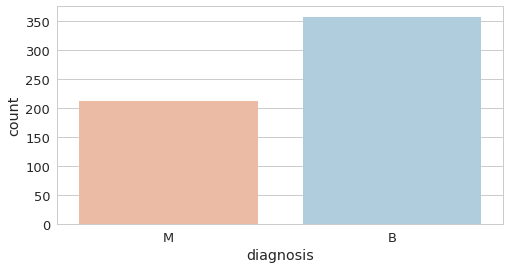

In [6]:
# visualize distribution of classes 
plt.figure(figsize=(8, 4))
sns.countplot(df['diagnosis'], palette='RdBu')

# count number of obvs in each class
benign, malignant = df['diagnosis'].value_counts()
print('Number of cells labeled Benign: ', benign)
print('Number of cells labeled Malignant : ', malignant)
print('')
print('% of cells labeled Benign', round(benign / len(df) * 100, 2), '%')
print('% of cells labeled Malignant', round(malignant / len(df) * 100, 2), '%')

Out of the 569 observations, 357 (or 62.7%) have been labeled malignant, while the rest 212 (or 37.3%) have been labeled benign. Later when we develop a predictive model and test it on unseen data, we should expect to see a similar proportion of labels.

Although our dataset has 30 columns excluding the **id** and the **diagnosis** columns, they are all in fact very closely related since they all contain information on the same 10 key attributes but only differ in terms of their perspectives (i.e., the mean, standard errors, and the mean of the three largest values denoted as "worst"). 

In this sense, we could attempt to dig out some quick insights by analyzing the data in only one of the three perspectives. For instance, we could choose to check out the relationship between the 10 key attributes and the **diagnosis** variable by only choosing the "mean" columns.

Let's quickly scan for any interesting patterns between our 10 "mean" columns and the response variable by generating a scatter plot matrix as shown below:

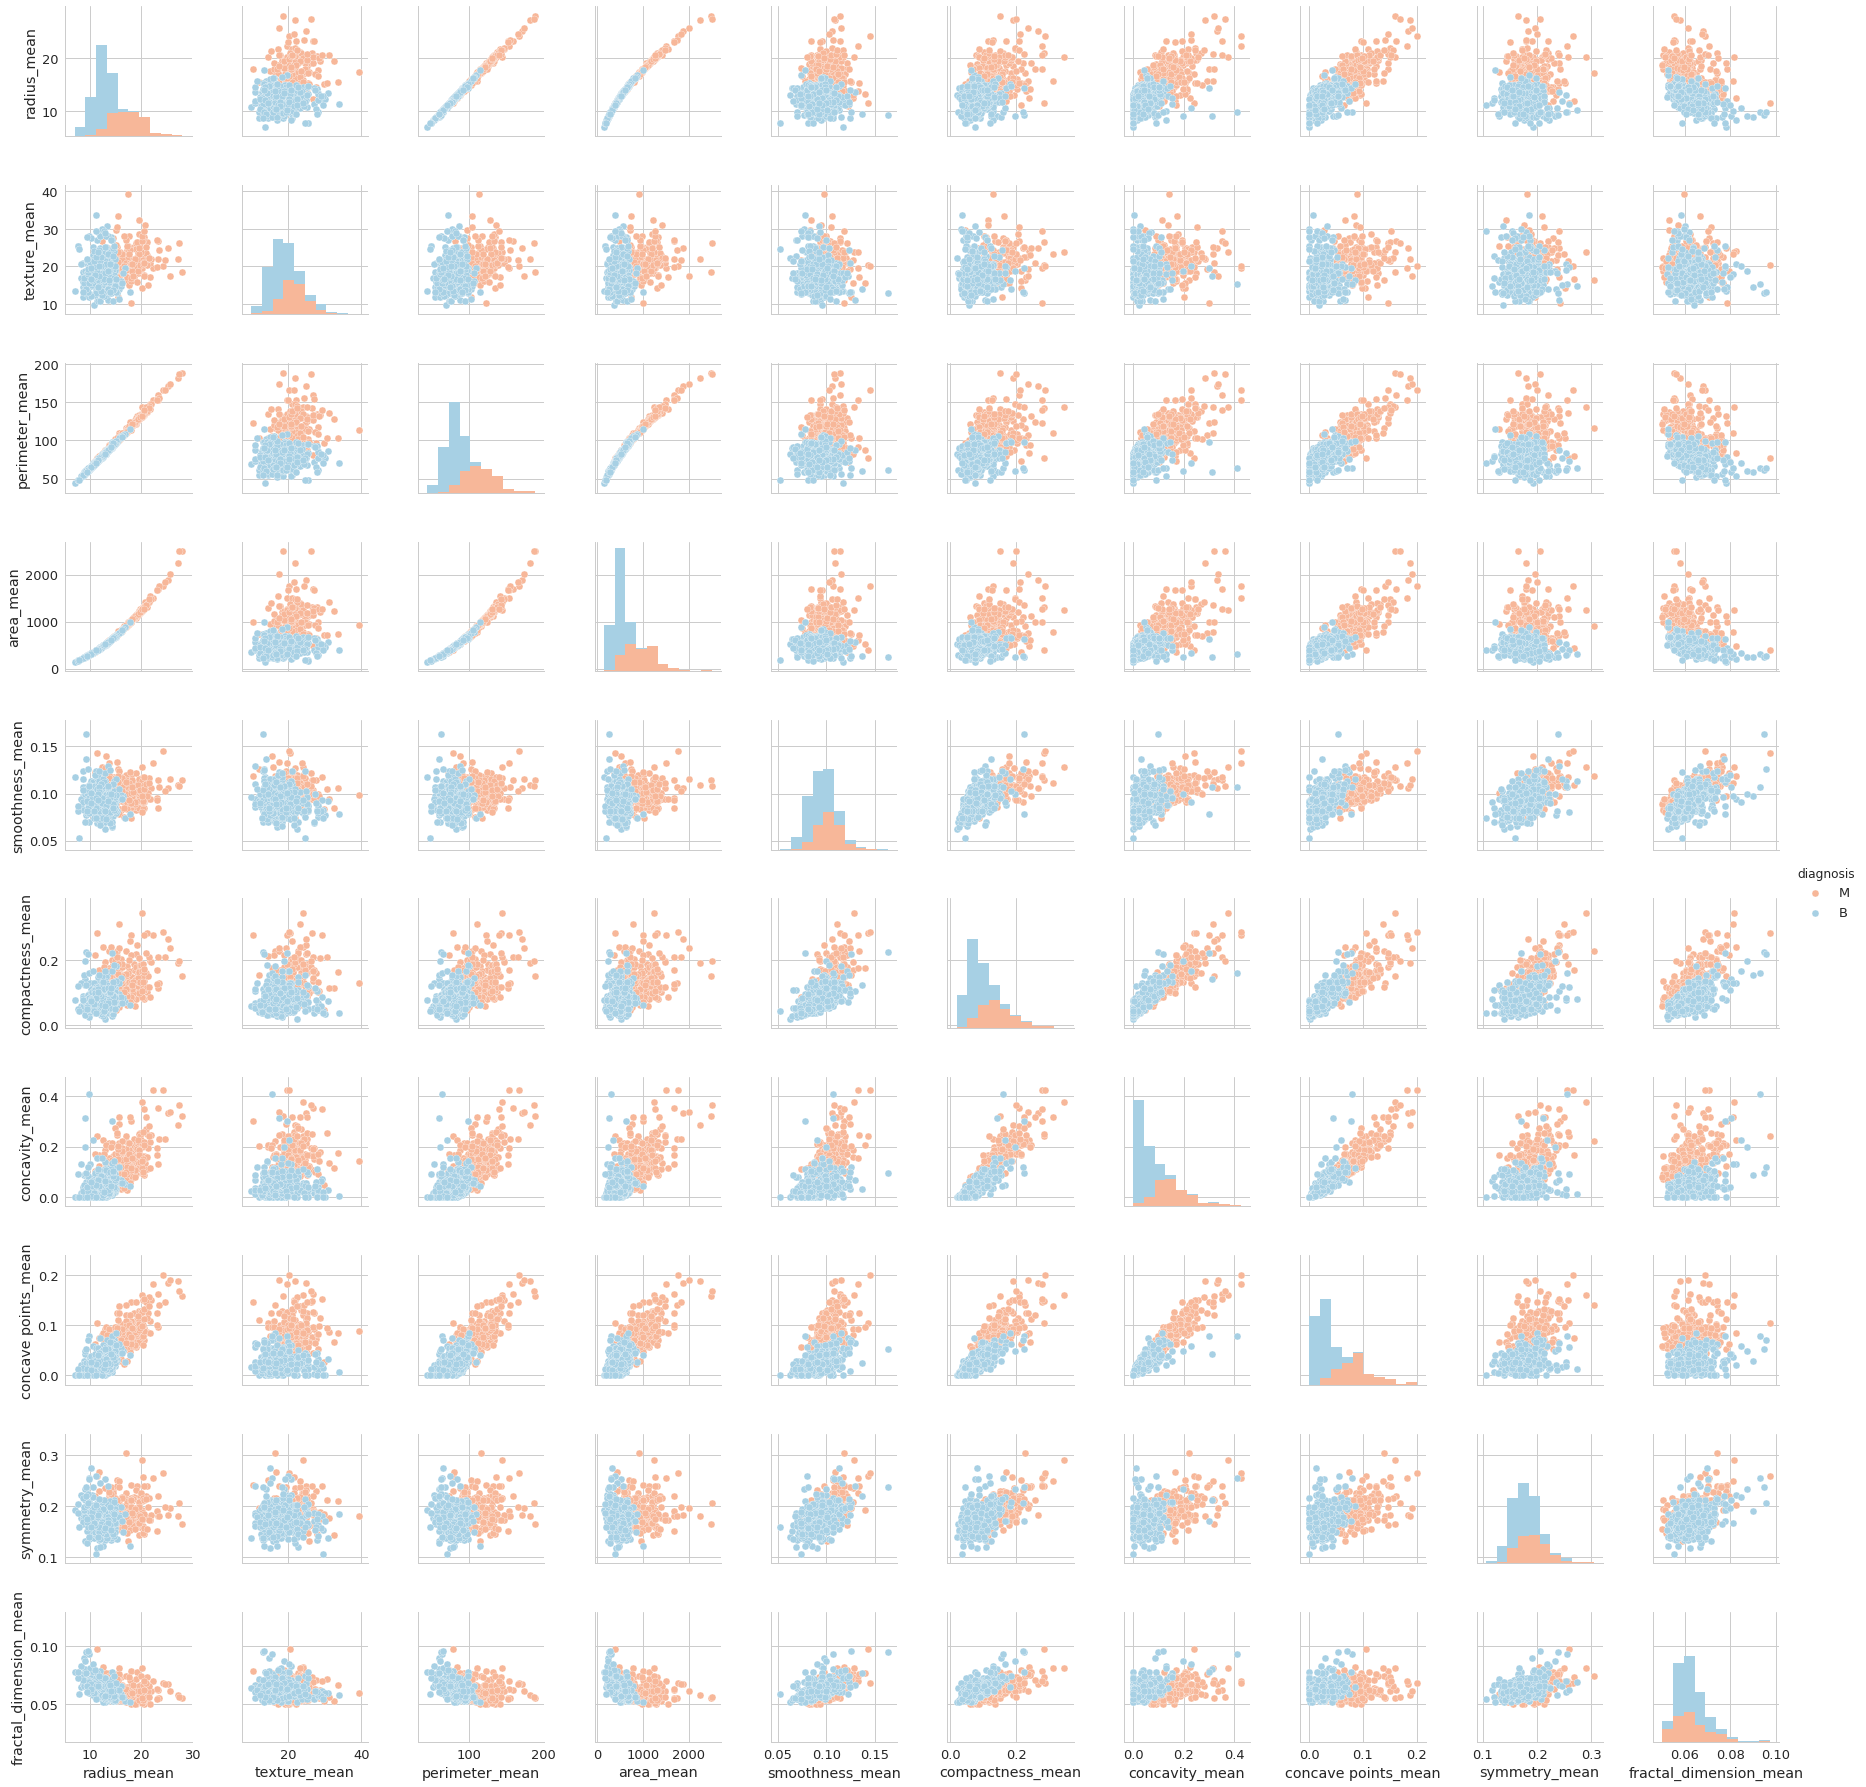

In [7]:
# generate a scatter plot matrix with the "mean" columns
cols = ['diagnosis',
        'radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']

sns.pairplot(data=df[cols], hue='diagnosis', palette='RdBu')

There are some interesting patterns visible. For instance, the almost perfectly linear patterns between the **radius**, **perimeter** and **area** attributes are hinting at the presence of multicollinearity between these variables. Another set of variables that possibly imply multicollinearity are the **concavity**, **concave_points** and **compactness**. 

In the coming up section, we will generate a matrix similar to the one above, but this time displaying the correlations between the variables instead of a scatter plot. Let's find out if our hypothesis about the multicollinearity has any statistical support. 

# 2. The Variables
---
As said earlier, let's take a look at the correlations between our variables. This time however, we will create a correlation matrix with all variables (i.e., the "mean" columns, the "standard errors" columns, as well as the "worst" columns).

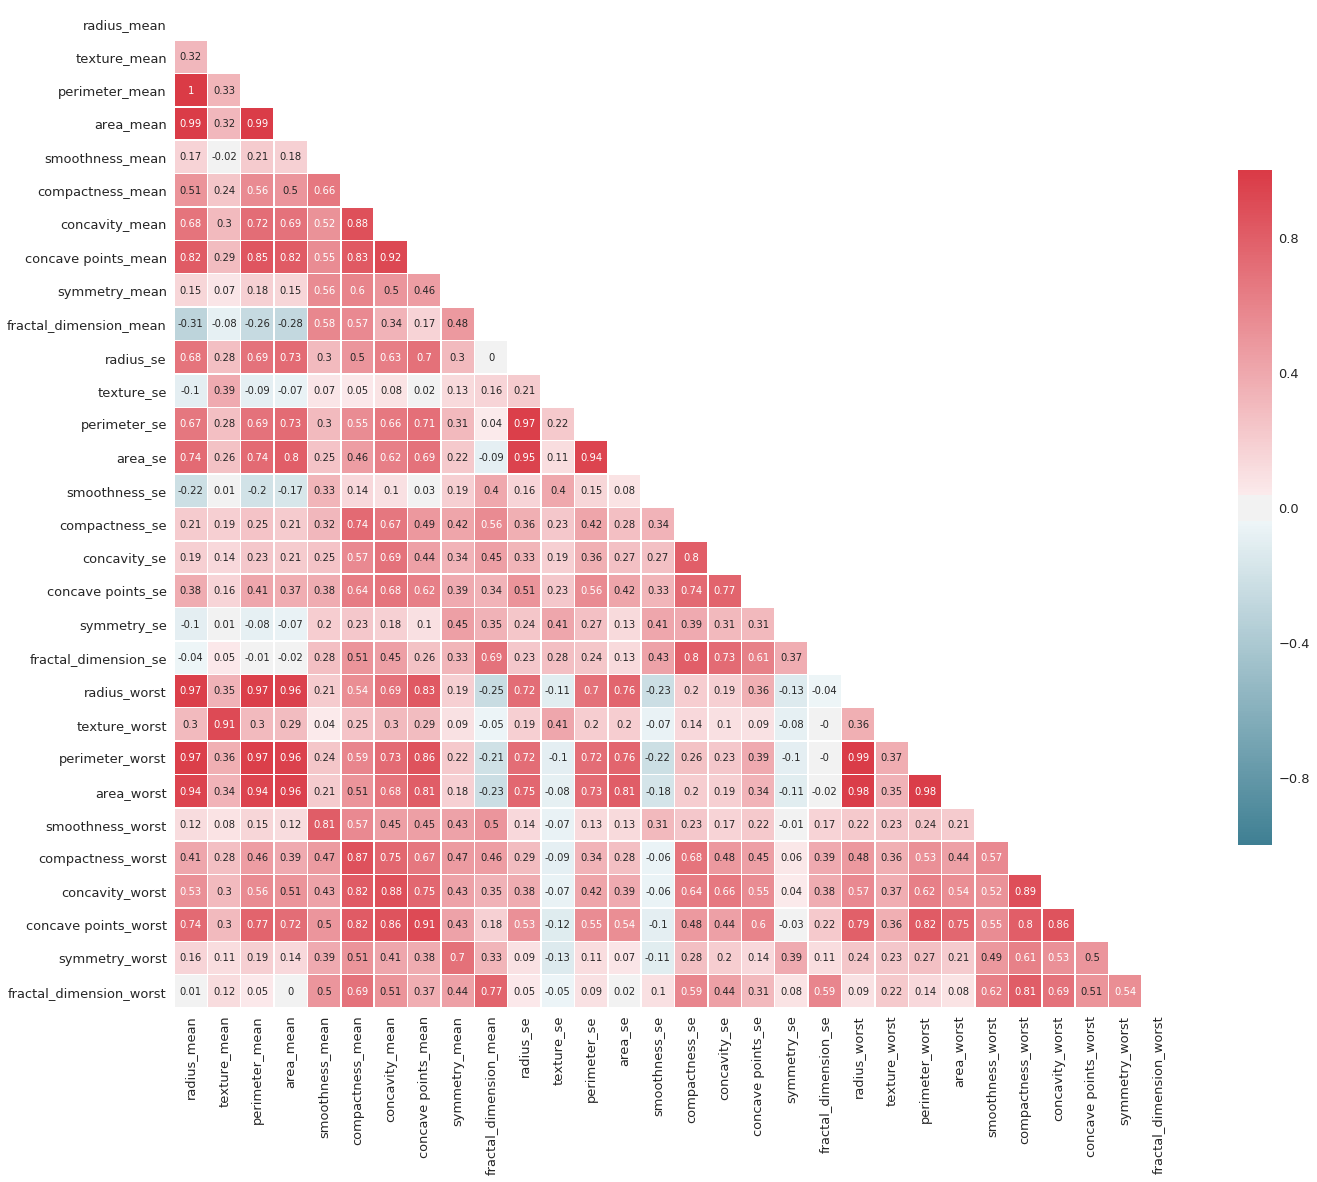

In [8]:
# Generate and visualize the correlation matrix
corr = df.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

Looking at the matrix, we can immediately verify the presence of multicollinearity between some of our variables. For instance, the **radius_mean** column has a correlation of 1 and 0.99 with **perimeter_mean** and **area_mean** columns, respectively. This is probably because the three columns essentially contain the same information, which is the physical size of the observation (the cell). Therefore we should only pick one of the three columns when we go into further analysis. 

Another place where multicollienartiy is apparent is between the "mean" columns and the "worst" column. For instance, the **radius_mean** column has a correlation of 0.97 with the **radius_worst** column. In fact, each of the 10 key attributes display very high (from 0.7 up to 0.97) correlations between its "mean" and "worst" columns. This is somewhat inevitable, because the "worst" columns are essentially just a subset of the "mean" columns; the "worst" columns are also the "mean" of some values (the three largest values among all observations). Therefore, I think we should discard the "worst" columns from our analysis and only focus on the "mean" columns. 

In short, we will drop all "worst" columns from our dataset, then pick only one of the three attributes that describe the size of cells. But which one should be pick?

Let's quickly go back to 6th grade and review some geometry. If we think of a cell as roughly taking a form of a circle, then the formula for its radius is, well, its radius,  *r*. The formulae for its perimeter and area are then **\\(2\pi r\\) ** and **\\(\pi r^2\\) **, respectively. As we can see, a cell's **radius** is the basic building block of its size. Therefore, I think it is reasonable to choose **radius** as our attribute to represent the size of a cell. 

Similarly, it seems like there is multicollinearity between the attributes **compactness**, **concavity**, and **concave points**. Just like what we did with the size attributes, we should pick only one of these three attributes that contain information on the shape of the cell. I think **compactness** is an attribute name that is straightforward, so I will remove the other two attributes. 

We will now go head and drop all unnecessary columns. 

In [9]:
# first, drop all "worst" columns
cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst']
df = df.drop(cols, axis=1)

# then, drop all columns related to the "perimeter" and "area" attributes
cols = ['perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se']
df = df.drop(cols, axis=1)

# lastly, drop all columns related to the "concavity" and "concave points" attributes
cols = ['concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se']
df = df.drop(cols, axis=1)

# verify remaining columns
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

Are we all set now?

Let's take a look at the correlation matrix once again, this time created with our trimmed-down set of variables.

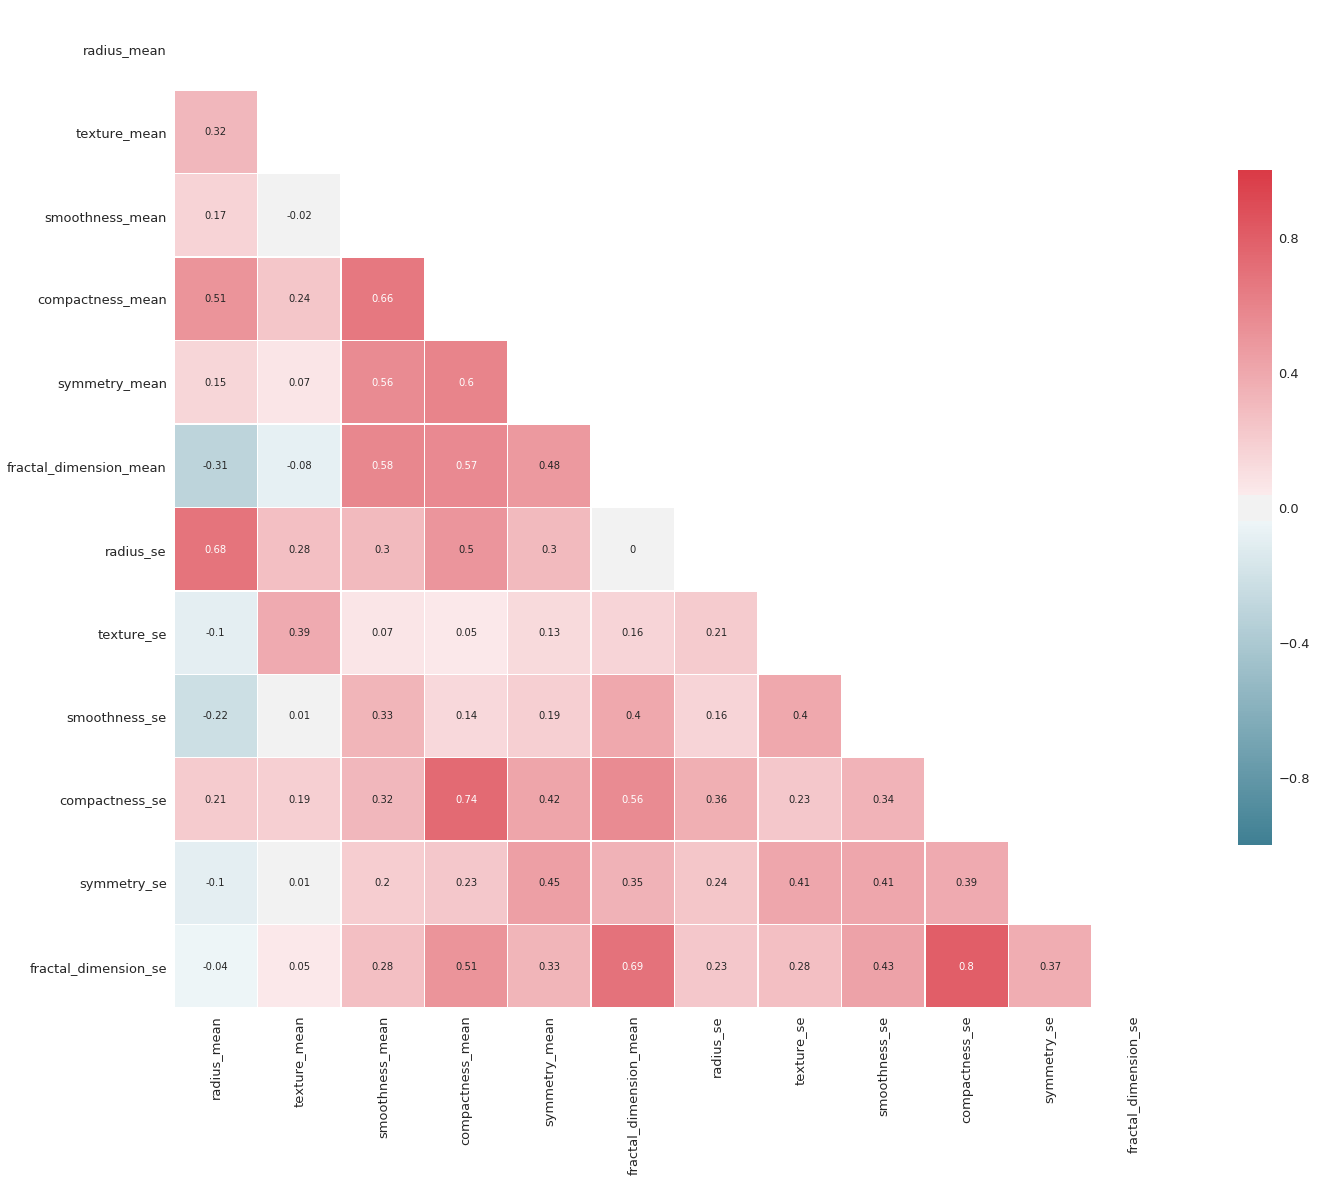

In [10]:
# Draw the heatmap again, with the new correlation matrix
corr = df.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

Looks great! Now let's move on to our model.

# 3. The Model
___

It's finally time to develop our model! We will start by first splitting our dataset into two parts; one as a training set for the model, and the other as a test set to validate the predictions that the model will make. If we omit this step, the model will be trained and tested on the same dataset, and it will underestimate the true error rate, a phenomenon known as **overfitting**. It is like writing an exam after taking a look at the questions and answers beforehand. We want to make sure that our model truly has predictive power and is able to accurately label unseen data. We will set the test size to 0.3; i.e., 70% of the data will be assigned to the training set, and the remaining 30% will be used as a test set. In order to obtain consistent results, we will set the random state parameter to a value of 40.

In [11]:
# Split the data into training and testing sets
X = df
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

Now that we have split our data into appropriate sets, let's write down the formula to be used for the `logistic regression`.

In [12]:
# Create a string for the formula
cols = df.columns.drop('diagnosis')
formula = 'diagnosis ~ ' + ' + '.join(cols)
print(formula, '\n')

diagnosis ~ radius_mean + texture_mean + smoothness_mean + compactness_mean + symmetry_mean + fractal_dimension_mean + radius_se + texture_se + smoothness_se + compactness_se + symmetry_se + fractal_dimension_se 



The formula includes all of the variables that were finally selected at the end of the previous section. We will now run the `logistic regression` with this formula and take a look at the results.

In [13]:
# Run the model and report the results
model = smf.glm(formula=formula, data=X_train, family=sm.families.Binomial())
logistic_fit = model.fit()

print(logistic_fit.summary())

                        Generalized Linear Model Regression Results                         
Dep. Variable:     ['diagnosis[B]', 'diagnosis[M]']   No. Observations:                  398
Model:                                          GLM   Df Residuals:                      385
Model Family:                              Binomial   Df Model:                           12
Link Function:                                logit   Scale:                             1.0
Method:                                        IRLS   Log-Likelihood:                -55.340
Date:                              Thu, 12 Oct 2017   Deviance:                       110.68
Time:                                      04:17:21   Pearson chi2:                     125.
No. Iterations:                                   9                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

Great! In the next section, we will feed in the test data to this model to yield predictions of labels. Then, we will evaluate how accurately the model have predicted the data. 

# 4. The Prediction
___

In the previous section, we have successfully developed a logistic regression model. This model can take some unlabeled data and effectively assign each observation a probability ranging from 0 to 1. This is the key feature of a logistic regression model. However, for us to evaluate whether the predictions are accurate, the predictions must be encoded so that each instance can be compared directly with the labels in the test data. In other words, instead of numbers between 0 or 1, the predictions should show "M" or "B", denoting malignant and benign respectively. In our model, a probability of 1 corresponds to the "Benign" class, whereas a probability of 0 corresponds to the "Malignant" class. Therefore, we can apply a threshhold value of 0.5 to our predictions, assigning all values closer to 0 a label of "M" and assigniing all values closer to 1 a label of "B". 

If this is confusiing, let's go through this step-by-step.

In [14]:
# predict the test data and show the first 5 predictions
predictions = logistic_fit.predict(X_test)
predictions[1:6]

id
848406      0.324251
907915      0.996906
911201      0.964710
84799002    0.000544
8911164     0.838719
dtype: float64

In [15]:
# Note how the values are numerical. 
# Convert these probabilities into nominal values and check the first 5 predictions again.
predictions_nominal = [ "M" if x < 0.5 else "B" for x in predictions]
predictions_nominal[1:6]

['M', 'B', 'B', 'M', 'B']

We can confirm that probabilities closer to 0 have been labeled as "M", while the ones closer to 1 have been labeled as "B". Now we are able to evaluate the accuracy of our predictions by checking out the classification report and the confusion matrix.

In [16]:
print(classification_report(y_test, predictions_nominal, digits=3))

cfm = confusion_matrix(y_test, predictions_nominal)

true_negative = cfm[0][0]
false_positive = cfm[0][1]
false_negative = cfm[1][0]
true_positive = cfm[1][1]

print('Confusion Matrix: \n', cfm, '\n')

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
print('Correct Predictions', 
      round((true_negative + true_positive) / len(predictions_nominal) * 100, 1), '%')

             precision    recall  f1-score   support

          B      0.982     0.965     0.974       115
          M      0.931     0.964     0.947        56

avg / total      0.966     0.965     0.965       171

Confusion Matrix: 
 [[111   4]
 [  2  54]] 

True Negative: 111
False Positive: 4
False Negative: 2
True Positive: 54
Correct Predictions 96.5 %


Our model have accurately labeled 96.5% of the test data. This is just the beginning however. We could try to increase the accuracy even higher by using a different algorithm other than the `logistic regression`, or try our model with different set of variables. There are defintely many more things that could be done to modify our model, but I will conclude this report here for now.

Thank you so much for reading through this report. As I mentioned in the beginning, this is my first ever Kernel on Kaggle. I hope you enjoyed it, and please leave comments below for feedbacks and suggestions!